In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
import findspark

In [3]:
findspark.find()

'E:\\Spark\\spark-3.1.2-bin-hadoop3.2'

In [6]:
import findspark
findspark.find()
import pyspark
from pyspark.sql import SparkSession

# create a spark session
spark = SparkSession.builder.appName('load_from_db').getOrCreate()

# set the database connection properties
url = "jdbc:mysql://localhost:3306/mydatabase"
table = "mytable"
user = "myuser"
password = "mypassword"

# read data from the database using JDBC
df = spark.read.format("jdbc") \
    .option("url", url) \
    .option("dbtable", table) \
    .option("user", user) \
    .option("password", password) \
    .load()

# show the data
df.show()

ModuleNotFoundError: No module named 'pyspark'

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [3]:
m = Prophet()
m.fit(df)

14:14:05 - cmdstanpy - INFO - Chain [1] start processing
14:14:06 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.204233    7.406230    8.931081
3266 2017-01-16  8.529241    7.787702    9.293973
3267 2017-01-17  8.316651    7.595185    9.113185
3268 2017-01-18  8.149239    7.394597    8.948458
3269 2017-01-19  8.161151    7.497265    8.918398

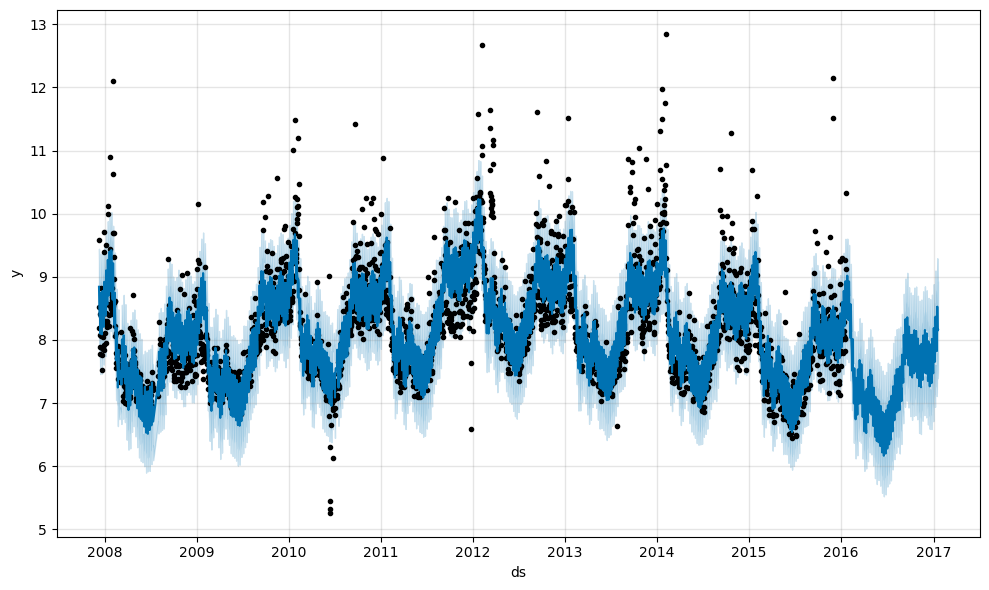

In [6]:
fig1 = m.plot(forecast)



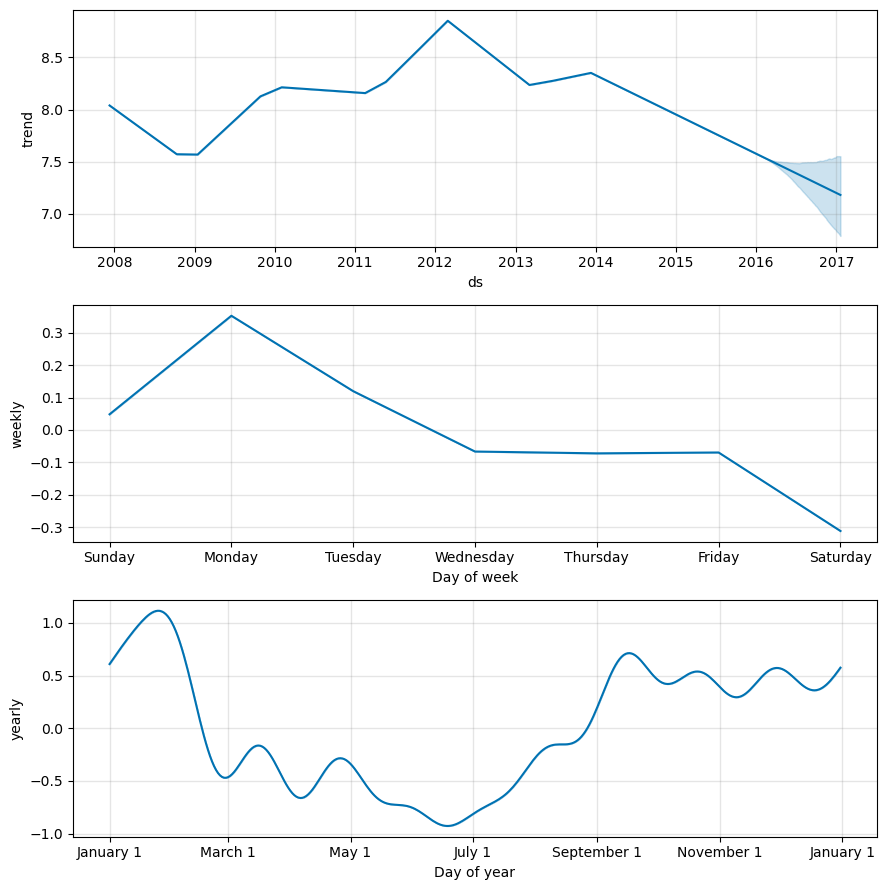

In [7]:
fig2 = m.plot_components(forecast)


In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [9]:
plot_components_plotly(m, forecast)
